In [177]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve, f1_score, accuracy_score


import matplotlib.pyplot as plt 
from matplotlib import style
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 50)

In [178]:
df_lead = pd.read_csv(r'C:\Users\prana\OneDrive\Desktop\Study\Upgrad\Lead Score case study\Lead Scoring Assignment\Leads.csv')

df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [179]:
 df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [180]:
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## DATA CLEANING

In [181]:
# Correcting column names
df_lead.columns = ['_'.join(name.lower().split()[:3]) for name in df_lead.columns]

#Correcting categorical values
categorical_cols = df_lead.select_dtypes(include=['object']).columns
df_lead[categorical_cols] = df_lead[categorical_cols].apply(lambda x: x.str.lower().str.replace(' ', '_').str.strip())

# looking at all unique values for every column to check for inconsistencies
for col in df_lead.columns[2:]:
    print(col.upper(), end=': ')
    print(df_lead[col].unique())
    print()
    


LEAD_ORIGIN: ['api' 'landing_page_submission' 'lead_add_form' 'lead_import'
 'quick_add_form']

LEAD_SOURCE: ['olark_chat' 'organic_search' 'direct_traffic' 'google' 'referral_sites'
 'welingak_website' 'reference' 'facebook' nan 'blog' 'pay_per_click_ads'
 'bing' 'social_media' 'welearn' 'click2call' 'live_chat'
 'welearnblog_home' 'youtubechannel' 'testone' 'press_release' 'nc_edm']

DO_NOT_EMAIL: ['no' 'yes']

DO_NOT_CALL: ['no' 'yes']

CONVERTED: [0 1]

TOTALVISITS: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  32.  42.]

TOTAL_TIME_SPENT: [   0  674 1532 ...  603  483  927]

PAGE_VIEWS_PER: [ 0.    2.5   2.    1.    4.    8.    2.67 11.    5.    6.    3.    1.33
  1.5   3.5   7.    2.33 13.    8.5   5.5   1.67   nan  4.5   3.33 16.
 12.    1.71  1.8   6.5   4.33 14.    3.4  10.    1.25  1.75  2.63 15.
  2.25  3.67  1.43  9.  

### Observation:

#### 1) Some of the columns are Redundant 
#### 2) Some of the category is seen as different due to different case. (ex. Google -> google)
#### 3) Select is equivalent to NaN.
#### 4) Their may be possible overlaps in City column.

In [182]:
# removing redundant columns
df_lead.drop(['prospect_id', 'lead_number', 'receive_more_updates', 'update_me_on', 'get_updates_on', 'i_agree_to', 'last_activity'], axis=1, inplace=True)

# Replacing all 'select' values with NaN
df_lead = df_lead.replace('select', np.nan)

# Replacing "wrong number given" with "invalid number"
df_lead.tags = df_lead.tags.replace("wrong_number_given", "invalid_number")

# Cleaning "lead_source column"
value_counts = df_lead.lead_source.value_counts()

# Classifing Values with frequency less than 30 as "others"
df_lead.lead_source = df_lead.lead_source.replace(value_counts[value_counts < 30].index, "others")

# Cleaning "country"

value_counts = df_lead.country.value_counts()

# categorising Country as 'India' and 'Other' 
df_lead.country = df_lead.country.replace(df_lead.country[df_lead.country != 'india'].dropna().unique(), "others")


In [183]:
df_lead.head()

,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent,page_views_per,country,specialization,how_did_you,what_is_your,what_matters_most,search,magazine,newspaper_article,x_education_forums,newspaper,digital_advertisement,through_recommendations,tags,lead_quality,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,a_free_copy,last_notable_activity
0,api,olark_chat,no,no,0,0.0,0,0.0,NaN,NaN,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,interested_in_other_courses,low_in_relevance,NaN,NaN,02.medium,02.medium,15.0,15.0,no,modified
1,api,organic_search,no,no,0,5.0,674,2.5,india,NaN,NaN,unemployed,better_career_prospects,no,no,no,no,no,no,no,ringing,NaN,NaN,NaN,02.medium,02.medium,15.0,15.0,no,email_opened
2,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.0,india,business_administration,NaN,student,better_career_prospects,no,no,no,no,no,no,no,will_revert_after_reading_the_email,might_be,potential_lead,mumbai,02.medium,01.high,14.0,20.0,yes,email_opened
3,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.0,india,media_and_advertising,word_of_mouth,unemployed,better_career_prospects,no,no,no,no,no,no,no,ringing,not_sure,NaN,mumbai,02.medium,01.high,13.0,17.0,no,modified
4,landing_page_submission,google,no,no,1,2.0,1428,1.0,india,NaN,other,unemployed,better_career_prospects,no,no,no,no,no,no,no,will_revert_after_reading_the_email,might_be,NaN,mumbai,02.medium,01.high,15.0,18.0,no,modified


### NaN Values

#### Finding percentage of NA values 



In [184]:
round(df_lead.isna().sum().sort_values(ascending=False)/len(df_lead)*100, 2)

how_did_you                    78.46
lead_profile                   74.19
lead_quality                   51.59
asymmetrique_profile_score     45.65
asymmetrique_activity_score    45.65
asymmetrique_profile_index     45.65
asymmetrique_activity_index    45.65
city                           39.71
specialization                 36.58
tags                           36.29
what_matters_most              29.32
what_is_your                   29.11
country                        26.63
page_views_per                  1.48
totalvisits                     1.48
lead_source                     0.39
through_recommendations         0.00
a_free_copy                     0.00
lead_origin                     0.00
newspaper_article               0.00
digital_advertisement           0.00
newspaper                       0.00
x_education_forums              0.00
magazine                        0.00
search                          0.00
total_time_spent                0.00
converted                       0.00
d

In [185]:
# Column "how_did_you" has too many NA values so it is better to drop the column. 
df_lead.drop('how_did_you', axis=1, inplace=True)

# Column "lead_profile" has too many NA values so it is better to drop the column.
df_lead.drop('lead_profile', axis=1, inplace=True)

# Column "lead_quality" has 52% NA values. We can classify it as "not_sure  ".
df_lead.lead_quality.fillna("not_sure", inplace=True)
print(df_lead.lead_quality.value_counts())

not_sure             5859
might_be             1560
high_in_relevance     637
worst                 601
low_in_relevance      583
Name: lead_quality, dtype: int64


In [186]:
## Exploring 'Country' 
for country in df_lead.country.dropna().unique():
    print(country.upper())
    print(df_lead['city'][df_lead.country == country].value_counts())
    print()

INDIA
mumbai                         2918
thane_&_outskirts               651
other_cities                    564
other_cities_of_maharashtra     391
other_metro_cities              345
tier_ii_cities                   69
Name: city, dtype: int64

OTHERS
mumbai                         93
other_cities                   67
other_cities_of_maharashtra    23
thane_&_outskirts              21
other_metro_cities             20
tier_ii_cities                  3
Name: city, dtype: int64



### It seem like some leads from abroad are marked as being from indian cities

In [187]:
## Exploring 'City' 

for city in df_lead.city.dropna().unique():
    print(city.upper())
    print(df_lead[df_lead.city == city]['country'].value_counts())
    print()

MUMBAI
india     2918
others      93
Name: country, dtype: int64

THANE_&_OUTSKIRTS
india     651
others     21
Name: country, dtype: int64

OTHER_METRO_CITIES
india     345
others     20
Name: country, dtype: int64

OTHER_CITIES
india     564
others     67
Name: country, dtype: int64

OTHER_CITIES_OF_MAHARASHTRA
india     391
others     23
Name: country, dtype: int64

TIER_II_CITIES
india     69
others     3
Name: country, dtype: int64



In [188]:
# Lets make a new label ('international') for countries labeled as 'others'
df_lead.city[df_lead.country == "others"] = df_lead.city[df_lead.country == "others"].replace(df_lead.city[df_lead.country == "others"].unique(), 'international')

In [189]:
# Lets assume that leads with a domestic city label should have country label as 'india'.
df_lead.country[(df_lead.city != "international") & ~df_lead.city.isna()] = 'india'

In [190]:
# Lets assume that leads with a country label 'india'will have most frequently occuring city label as 'mumbai'.
df_lead.city[(df_lead.country == "india") & (df_lead.city.isna())] = 'mumbai'

In [191]:
# finding leads with both countries and cities are labeled as 'na' and marking them as 'unknoown'

print(len(df_lead[(df_lead.city.isna()) & (df_lead.country.isna())]))

df_lead[['city', 'country']] = df_lead[['city', 'country']].fillna('unknown', axis=1)

2055


In [192]:
# Some columns has less than 2% na values. We can drop these rows. 
df_lead.dropna(subset=['totalvisits', 'page_views_per', 'lead_source'], inplace=True)

# lets drop these columns as there are too many NA values
df_lead.drop(['specialization', 'tags', 'what_matters_most', 'what_is_your'] , axis=1, inplace=True)

round(df_lead.isna().sum().sort_values(ascending=False), 2)

asymmetrique_profile_score     4153
asymmetrique_activity_score    4153
asymmetrique_profile_index     4153
asymmetrique_activity_index    4153
lead_origin                       0
lead_source                       0
a_free_copy                       0
city                              0
lead_quality                      0
through_recommendations           0
digital_advertisement             0
newspaper                         0
x_education_forums                0
newspaper_article                 0
magazine                          0
search                            0
country                           0
page_views_per                    0
total_time_spent                  0
totalvisits                       0
converted                         0
do_not_call                       0
do_not_email                      0
last_notable_activity             0
dtype: int64

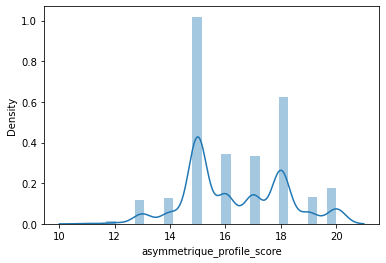

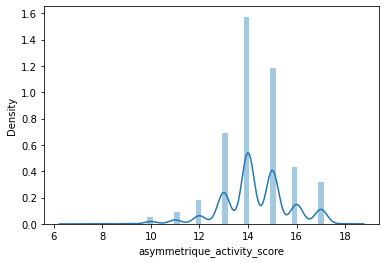

In [193]:
# Exploring Asymmetrique scores
for col in ['profile_score', 'activity_score']:
    sns.distplot(df_lead['asymmetrique_'+col].dropna())
    plt.show()

#### It follows standard distribution. we can use index instead of scores, as index is categorical 

In [194]:
# Lets drop scores
df_lead.drop(['asymmetrique_profile_score', 'asymmetrique_activity_score'], axis=1, inplace=True)

In [195]:
# Lets Remove initial numbers from category naming
df_lead['asymmetrique_profile_index'] = df_lead['asymmetrique_profile_index'].str[3:]
df_lead['asymmetrique_activity_index'] = df_lead['asymmetrique_activity_index'].str[3:]

# Lets Replace nan with most commonly occuring category
df_lead['asymmetrique_activity_index'].fillna(df_lead['asymmetrique_activity_index'].mode().values[0], inplace=True)
df_lead['asymmetrique_profile_index'].fillna(df_lead['asymmetrique_profile_index'].mode().values[0], inplace=True)

### One hot encoding

In [196]:

lead_dummies = pd.get_dummies(df_lead.select_dtypes(include=['object']), drop_first=True)

#Cleaned DataFrame 

lead_df = df_lead.drop(df_lead.select_dtypes(include=['object']).columns, axis=1)
lead_df = pd.concat([lead_df, lead_dummies], axis=1)

lead_df.head()

,converted,totalvisits,total_time_spent,page_views_per,lead_origin_landing_page_submission,lead_origin_lead_add_form,lead_origin_lead_import,lead_source_facebook,lead_source_google,lead_source_olark_chat,lead_source_organic_search,lead_source_others,lead_source_reference,lead_source_referral_sites,lead_source_welingak_website,do_not_email_yes,do_not_call_yes,country_others,country_unknown,search_yes,newspaper_article_yes,x_education_forums_yes,newspaper_yes,digital_advertisement_yes,through_recommendations_yes,...,city_other_cities_of_maharashtra,city_other_metro_cities,city_thane_&_outskirts,city_tier_ii_cities,city_unknown,asymmetrique_activity_index_low,asymmetrique_activity_index_medium,asymmetrique_profile_index_low,asymmetrique_profile_index_medium,a_free_copy_yes,last_notable_activity_email_bounced,last_notable_activity_email_link_clicked,last_notable_activity_email_marked_spam,last_notable_activity_email_opened,last_notable_activity_email_received,last_notable_activity_form_submitted_on_website,last_notable_activity_had_a_phone_conversation,last_notable_activity_modified,last_notable_activity_olark_chat_conversation,last_notable_activity_page_visited_on_website,last_notable_activity_resubscribed_to_emails,last_notable_activity_sms_sent,last_notable_activity_unreachable,last_notable_activity_unsubscribed,last_notable_activity_view_in_browser_link_clicked
0,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## EDA

#### Heatmap of Continuous Variables

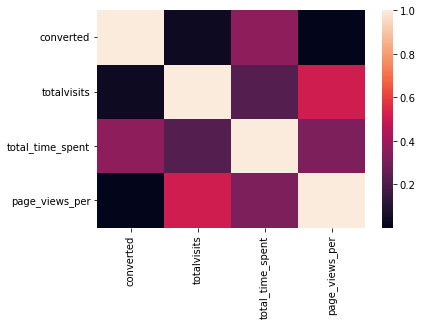

In [197]:
sns.heatmap(lead_df[lead_df.columns[:4]].corr())
plt.show()

#### Correlation between all variables

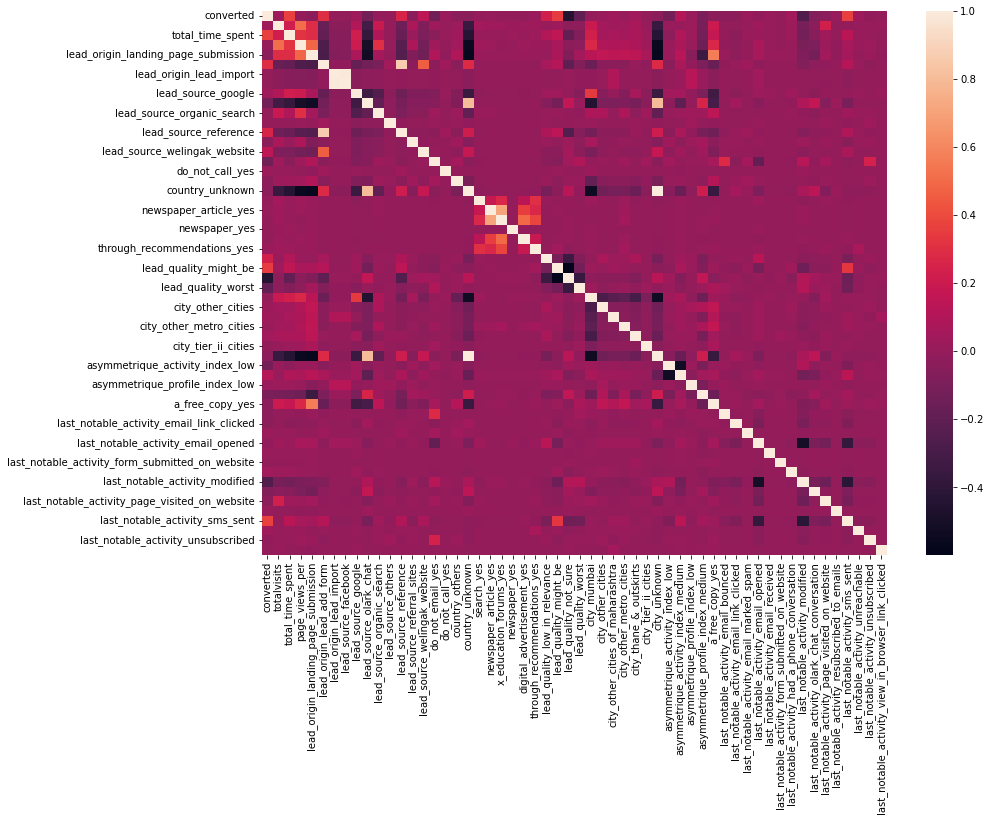

In [198]:
# visualizing correlation by heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(lead_df.corr())
plt.show()

In [199]:
# Columns in order of highest correlation
lead_df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(12)

converted                            converted                              1.000000
lead_source_facebook                 lead_origin_lead_import                0.983684
lead_source_reference                lead_origin_lead_add_form              0.866191
lead_source_olark_chat               city_unknown                           0.803772
newspaper_article_yes                x_education_forums_yes                 0.707068
lead_quality_might_be                lead_quality_not_sure                  0.597667
country_unknown                      lead_origin_landing_page_submission    0.566471
lead_origin_landing_page_submission  a_free_copy_yes                        0.564863
page_views_per                       country_unknown                        0.556781
city_mumbai                          country_unknown                        0.536886
lead_origin_landing_page_submission  lead_source_olark_chat                 0.528424
asymmetrique_activity_index_low      asymmetrique_activity_index_

In [200]:
# Lets Drop variables with high multi-collinearity
lead_df.drop(['lead_source_facebook', 'lead_origin_lead_add_form', 'lead_source_olark_chat'], axis=1, inplace=True)

# Top 5 features correlated with target variable
lead_df.corr()['converted'].abs().sort_values(ascending=False).head(6)

converted                         1.000000
lead_quality_not_sure             0.443920
last_notable_activity_sms_sent    0.360233
total_time_spent                  0.359261
lead_quality_might_be             0.349936
last_notable_activity_modified    0.263532
Name: converted, dtype: float64

### Outlier and Univariate analysis

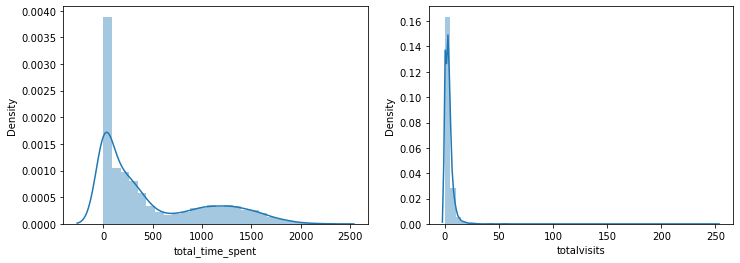

In [201]:
#Histogram
def Hist_plot():
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    sns.distplot(lead_df['total_time_spent'])

    plt.subplot(122)
    sns.distplot(lead_df['totalvisits'])
    plt.show()
    
Hist_plot()

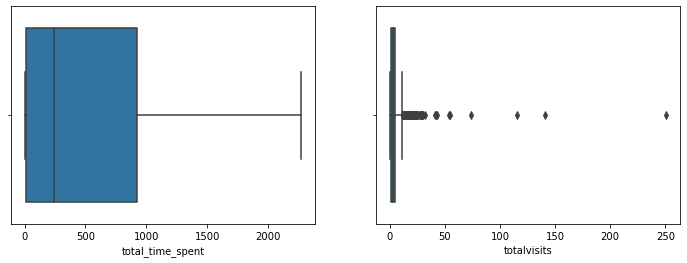

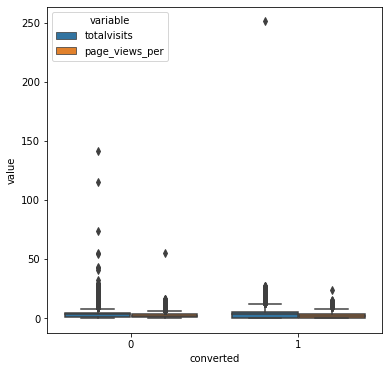

In [202]:
# Boxplots 
df = lead_df[['converted', 'totalvisits',  'page_views_per', 'total_time_spent']]

def Box_plot():
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    sns.boxplot(data=lead_df, x='total_time_spent')

    plt.subplot(122)
    sns.boxplot(data=lead_df, x='totalvisits')
    plt.show()

    plt.figure(figsize=(6, 6))
    box = pd.melt(df.drop('total_time_spent', axis=1), id_vars='converted')
    sns.boxplot(x='converted', y='value', hue='variable', data=box)
    plt.show()
    
Box_plot()

In [203]:
# Removing outliers
out = df.drop('converted', axis=1)
q = out.quantile(0.97)
out = out[out < q]
out = out.dropna()

lead_df = lead_df.loc[out.index].reset_index(drop=True)
df = df.loc[out.index].reset_index(drop=True)

df.head()

,converted,totalvisits,page_views_per,total_time_spent
0,0,0.0,0.0,0
1,0,5.0,2.5,674
2,1,2.0,2.0,1532
3,0,1.0,1.0,305
4,1,2.0,1.0,1428


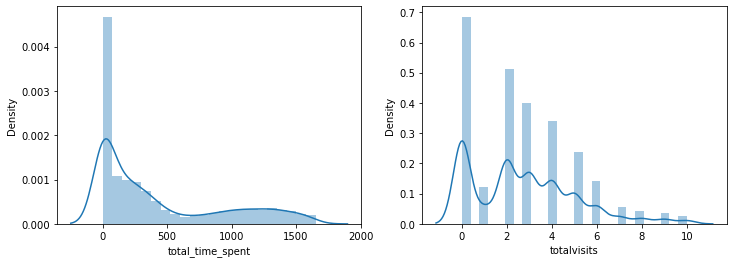

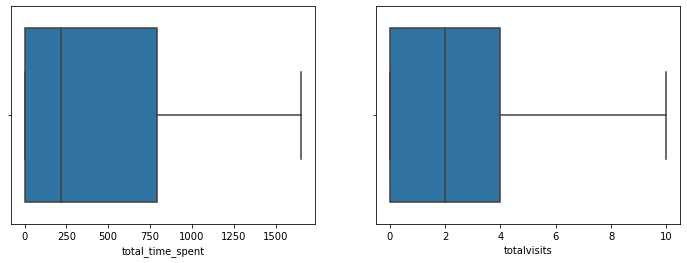

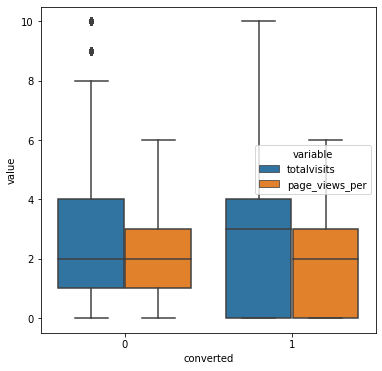

In [204]:
# Boxplots after removal of outliers

Hist_plot()
Box_plot()

### Bivariate Analysis

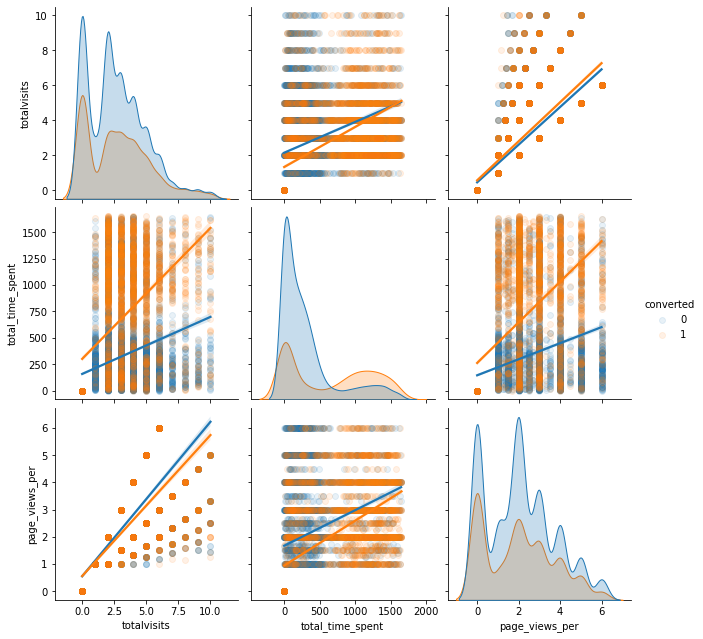

In [205]:
sns.pairplot(data=lead_df, vars=lead_df.columns[1:4], hue='converted', kind='reg', height=3,
             plot_kws={'scatter_kws': {'alpha': 0.1}})
plt.show()

### Predictive Model
#### Splitting into Train and Test¶

In [206]:
X = lead_df.drop('converted', axis=1)
y = lead_df['converted']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.33, random_state=42)

### Normalization

In [207]:
# Min Max Scaling
scaler = MinMaxScaler()
cols = X_train.columns
scale_X_train = pd.DataFrame(scaler.fit_transform(X_train[cols[:3]]), columns=cols[:3])
scale_X_train = pd.concat([scale_X_train, X_train.drop(cols[:3], axis=1).reset_index(drop=True)], axis=1)

scale_X_test = pd.DataFrame(scaler.transform(X_test[cols[:3]]), columns=cols[:3])
scale_X_test = pd.concat([scale_X_test, X_test.drop(cols[:3], axis=1).reset_index(drop=True)], axis=1)

### Principal Components

In [208]:
pca = PCA(random_state=42)
comp_df = pca.fit_transform(scale_X_train[cols[:3]])
frame = pd.DataFrame({'Features': cols[:3], 'PC1': pca.components_[0], 'PC2': pca.components_[1], 'PC3': pca.components_[2]})
frame

,Features,PC1,PC2,PC3
0,totalvisits,0.512978,-0.369512,0.774800
1,total_time_spent,0.597301,0.801911,-0.013018
2,page_views_per,0.616510,-0.469467,-0.632073


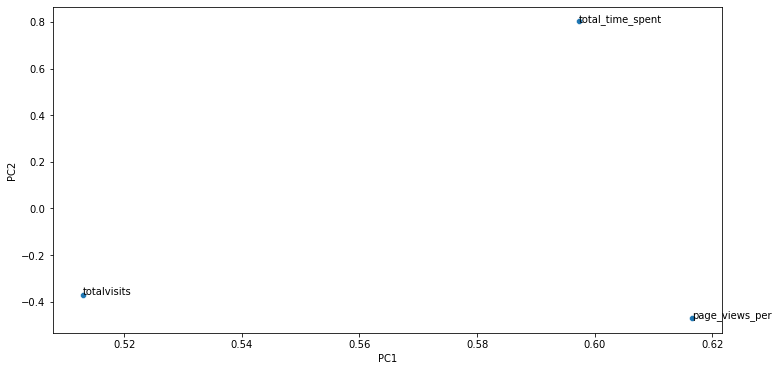

In [209]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=frame, x='PC1', y='PC2')
for i, text in enumerate(frame.Features):
    plt.annotate(text, (frame.PC1[i], frame.PC2[i]))

plt.show()

### Heatmap

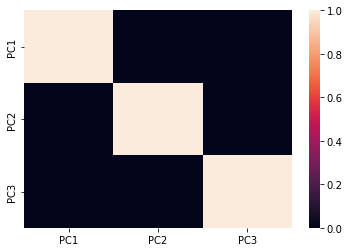

In [210]:

comp_df = pd.DataFrame(comp_df, columns=['PC1', 'PC2', 'PC3'])
sns.heatmap(comp_df.corr())
plt.show()

In [211]:
# We can use all 3 principal components
scale_X_train = pd.concat([scale_X_train.reset_index(drop=True), comp_df], axis=1)

# applying to test set
comp_test = pca.transform(scale_X_test[cols[:3]])
comp_test = pd.DataFrame(comp_test, columns=['PC1', 'PC2', 'PC3'])
scale_X_test = pd.concat([scale_X_test.reset_index(drop=True), comp_test], axis=1)



### Cross Validation

In [212]:
def best_features(min, max):
    
    best = list()
    for features in range(min, max):
        log = LogisticRegression(C=2, random_state=42)
        rfe = RFE(log, n_features_to_select=int(features), step=1)
        rfe.fit(scale_X_train, y_train)
        cols = scale_X_train.columns[rfe.support_]

        # Cross Validation
        scores = cross_validate(log, scale_X_train[cols], y_train, return_train_score=True, cv=5, scoring=['accuracy'])
        best.append((features, scores['test_accuracy'].mean()))
        
    best = np.array(best) 
    return best, best[best[:, 1].argmax()]
    

feat_array, best_features = best_features(1, 50)

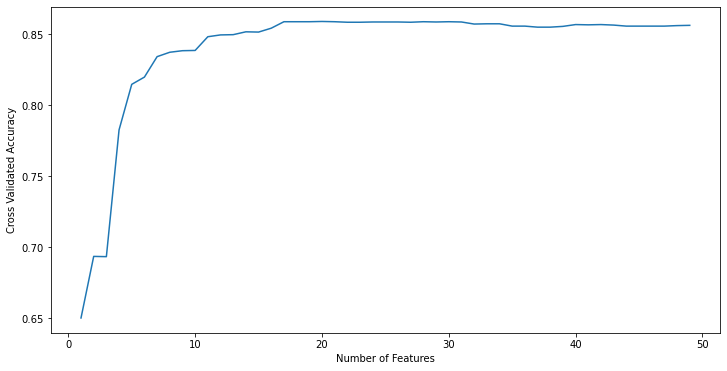

best features are 20.0 which gives 0.8587807097361237 accuracy.


In [213]:
plt.figure(figsize=(12, 6))
plt.plot(feat_array[:, 0], feat_array[:, 1])
plt.xlabel("Number of Features")
plt.ylabel("Cross Validated Accuracy")
plt.show()

print(f"best features are {best_features[0]} which gives {best_features[1]} accuracy.")


### RFE

In [214]:
log = LogisticRegression(C=2, random_state=42)
rfe = RFE(log,n_features_to_select=int(best_features[0]) ,step=1)
rfe.fit(scale_X_train, y_train)
cols = scale_X_train.columns[rfe.support_]
print(cols)

Index(['total_time_spent', 'lead_source_others', 'lead_source_reference',
       'lead_source_welingak_website', 'do_not_email_yes', 'do_not_call_yes',
       'search_yes', 'lead_quality_might_be', 'lead_quality_not_sure',
       'lead_quality_worst', 'city_unknown', 'asymmetrique_activity_index_low',
       'last_notable_activity_had_a_phone_conversation',
       'last_notable_activity_olark_chat_conversation',
       'last_notable_activity_resubscribed_to_emails',
       'last_notable_activity_sms_sent', 'last_notable_activity_unreachable',
       'PC1', 'PC2', 'PC3'],
      dtype='object')


In [215]:
def vif():
    vif = pd.DataFrame()
    vif['Features'] = scale_X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(scale_X_train[cols].values, i) for i in range(scale_X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
    
vif()


,Features,VIF
0,total_time_spent,24.07
17,PC1,11.89
18,PC2,7.40
8,lead_quality_not_sure,2.73
10,city_unknown,2.22
7,lead_quality_might_be,2.20
9,lead_quality_worst,1.61
2,lead_source_reference,1.31
15,last_notable_activity_sms_sent,1.17
3,lead_source_welingak_website,1.06


In [216]:
cols = cols.drop('total_time_spent')
vif().head()

,Features,VIF
9,city_unknown,2.87
16,PC1,2.17
7,lead_quality_not_sure,1.81
14,last_notable_activity_sms_sent,1.51
6,lead_quality_might_be,1.48


In [217]:
drop = ['lead_source_welingak_website']
X_train_sm = sm.add_constant(scale_X_train[cols].drop(drop, axis=1))
logm2 = sm.GLM(list(y_train), X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5495
Model:                            GLM   Df Residuals:                     5476
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2001.2
Date:                Mon, 17 Oct 2022   Deviance:                       4002.4
Time:                        20:09:01   Pearson chi2:                 5.53e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4430
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.3942      0.136     10.226      0.000       1.127       1.661
lead_source_others                                 0.8680      0.739      1.174      0.240      -0.581       2.317
lead_source_reference                              1.8240      0.274      6.660      0.000       1.287       2.361
do_not_email_yes                                  -1.1480      0.198     -5.799      0.000      -1.536      -0.760
do_not_call_yes                                   20.8391   2.04e+04      0.001      0.999      -4e+04       4e+04
search_yes                                        -2.1511      1.323     -1.626      0.104      -4.744       0.442
lead_quality_might_be                             -1.5592      0.167     -9.338      0.000      -1.886      -1.232
lead_quality_not_sure                             -3.5758      0.153    -23.408      0.000      -3.875      -3.276
lead_quality_worst                                -5.6696      0.414    -13.684      0.000      -6.482      -4.858
city_unknown                                       1.4834      0.146     10.163      0.000       1.197       1.769
asymmetrique_activity_index_low                   -1.8105      0.297     -6.098      0.000      -2.392      -1.229
last_notable_activity_had_a_phone_conversation     2.4113      1.262      1.911      0.056      -0.061       4.884
last_notable_activity_olark_chat_conversation     -1.0705      0.363     -2.950      0.003      -1.782      -0.359
last_notable_activity_resubscribed_to_emails      23.0080   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
last_notable_activity_sms_sent                     1.8635      0.093     20.113      0.000       1.682       2.045
last_notable_activity_unreachable                  2.0978      0.647      3.244      0.001       0.830       3.365
PC1                                                1.8098      0.158     11.478      0.000       1.501       2.119
PC2                                                3.0003      0.175     17.108      0.000       2.657       3.344
PC3                                                1.7118      0.326      5.252      0.000       1.073       2.351
==================================================================================================================
"""

In [221]:
drop = ['lead_source_welingak_website','last_notable_activity_resubscribed_to_emails','do_not_call_yes','lead_source_others','PC1','PC2']
X_train_sm = sm.add_constant(scale_X_train[cols].drop(drop, axis=1))
logm2 = sm.GLM(list(y_train), X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 5495
Model:                            GLM   Df Residuals:                     5481
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2284.8
Date:                Mon, 17 Oct 2022   Deviance:                       4569.6
Time:                        20:14:15   Pearson chi2:                 5.90e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3824
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                              1.7154      0.128     13.410      0.000       1.465       1.966
lead_source_reference                              1.4959      0.273      5.471      0.000       0.960       2.032
do_not_email_yes                                  -1.1514      0.185     -6.235      0.000      -1.513      -0.789
search_yes                                        -2.0993      1.381     -1.520      0.128      -4.806       0.607
lead_quality_might_be                             -1.4804      0.154     -9.617      0.000      -1.782      -1.179
lead_quality_not_sure                             -3.5074      0.140    -25.108      0.000      -3.781      -3.234
lead_quality_worst                                -5.6588      0.405    -13.963      0.000      -6.453      -4.865
city_unknown                                       0.3977      0.092      4.342      0.000       0.218       0.577
asymmetrique_activity_index_low                   -1.9347      0.284     -6.824      0.000      -2.490      -1.379
last_notable_activity_had_a_phone_conversation     2.0782      1.161      1.791      0.073      -0.197       4.353
last_notable_activity_olark_chat_conversation     -0.8252      0.339     -2.433      0.015      -1.490      -0.160
last_notable_activity_sms_sent                     1.8280      0.085     21.585      0.000       1.662       1.994
last_notable_activity_unreachable                  1.8362      0.642      2.860      0.004       0.578       3.094
PC3                                                1.5822      0.295      5.369      0.000       1.005       2.160
==================================================================================================================
"""

X_train_sm = sm.add_constant(scale_X_train[cols].drop(drop, axis=1))
logm2 = sm.GLM(list(y_train), X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

### Fitting the Model

In [225]:
score = cross_validate(log, scale_X_train[cols], y_train, return_train_score=True, cv=5, scoring=['accuracy'])
print(f"Cross validated accuracy: {round(score['test_accuracy'].mean(), 3)}")

log.fit(scale_X_train[cols], y_train)
pred = log.predict(scale_X_train[cols])
prob_est = log.predict_proba(scale_X_train[cols])

Cross validated accuracy: 0.859


## Measuring Model Performance



Sensitivity (Recall): 0.773247140726007
Specificity: 0.9090126291618829
Precision: 0.8306623931623932
F-Score: 0.8009271182075715


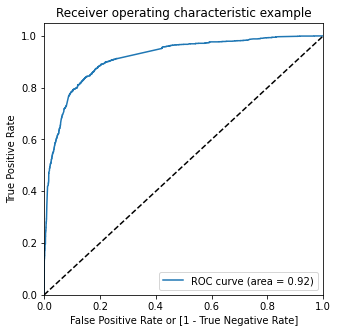

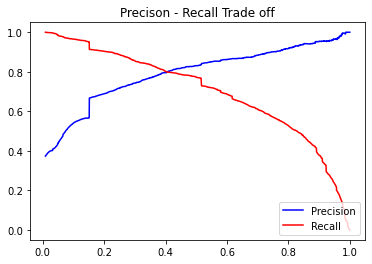

In [227]:
def draw(actual_values, probability_estimates):
    fpr, tpr, thresholds = roc_curve(actual_values, probability_estimates, drop_intermediate=False)
    auc_score = roc_auc_score(actual_values, probability_estimates)
    
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label=f"ROC curve (area = {round(auc_score, 2)})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

def draw_prec(actual_values, probability_estimates):
    
    p, r, thresholds = precision_recall_curve(actual_values, probability_estimates)
    plt.plot(thresholds, p[:-1], "b-", label="Precision")
    plt.plot(thresholds, r[:-1], "r-", label="Recall")
    plt.title("Precison - Recall Trade off")
    plt.legend(loc="lower right")
    plt.show()

def metrics(y, pred, prob_est):
    # Confusion Matrix
    tn, fp, fn, tp = confusion_matrix(y, pred).ravel()
    precision = precision_score(y, pred)
    recall = recall_score(y, pred)
    f = f1_score(y, pred)

    # Sensitivity, Specificity
    print(f"Sensitivity (Recall): {recall}\nSpecificity: {tn/(tn+fp)}\nPrecision: {precision}\nF-Score: {f}")

    # Reciever Operating Characteristic Curve
    draw(y, prob_est[:, 1])

    # Precision Recall Curve
    draw_prec(y, prob_est[:, 1])
    
metrics(y_train, pred, prob_est)

### Finding Optimal Cutoffs

In [230]:
# Making y_train_pred
y_train_pred = pd.DataFrame({'Converted':y_train, 'probability': prob_est[:, 1]})
numbers = np.round(np.linspace(0,1,40,endpoint=False), 2)
for i in numbers:
    y_train_pred_final[i]= y_train_pred.probability.map(lambda x: 1 if x > i else 0)

# Making cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = np.round(np.linspace(0,1,40,endpoint=False), 2)
for i in num:
    cm1 = confusion_matrix(y_train_pred.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df['var'] = np.var([cutoff_df.accuracy, cutoff_df.sensi, cutoff_df.speci], axis=0)

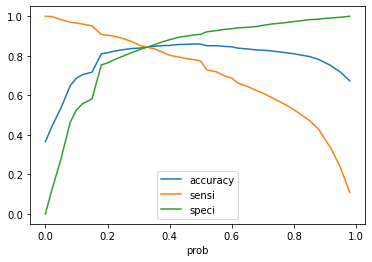

Optimum cut-off value is: 0.32


In [231]:
# plotting sensitivity,specificity and accuracy for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

cutoff_value = cutoff_df.sort_values('var').head(1)['prob'].values[0]
print(f"Optimum cut-off value is: {cutoff_value}")

Accuracy: 0.859326660600546
Sensitivity (Recall): 0.773247140726007
Specificity: 0.9090126291618829
Precision: 0.8306623931623932
F-Score: 0.8009271182075715


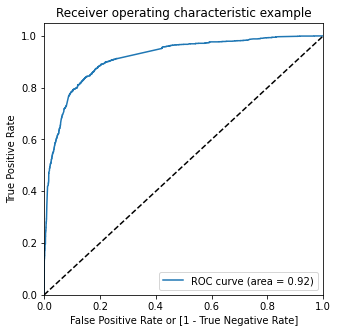

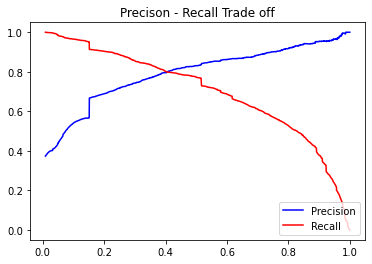

In [233]:
# Based on cut-off Values new predicted values
predicted_Values = (log.predict_proba(scale_X_train[cols])[:, 1] >= cutoff_value).astype(int)
print(f"Accuracy: {accuracy_score(y_train, pred)}")
metrics(y_train, pred, prob_est)

### Performance on Test Set

accuracy: 0.8511267085334319
Sensitivity (Recall): 0.8505050505050505
Specificity: 0.8514851485148515
Precision: 0.7675478577939836
F-Score: 0.8068998562529947


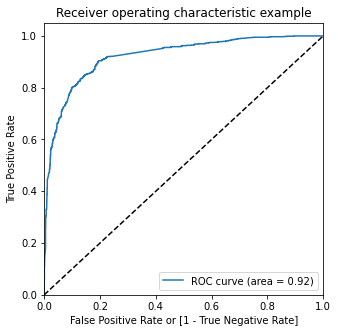

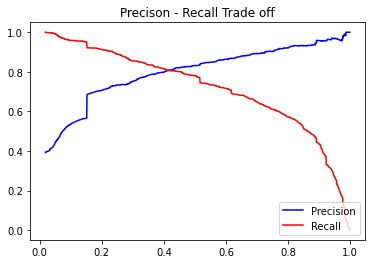

In [239]:
# Scoring against Test Set
log.fit(scale_X_train[cols], y_train)
predicted_Values = (log.predict_proba(scale_X_test[cols])[:, 1] >= cutoff_value).astype(int)
prob_est = log.predict_proba(scale_X_test[cols])
print(f"accuracy: {accuracy_score(y_test, predicted_Values)}")
metrics(y_test, predicted_Values, prob_est)

### Now, we have an overall accuracy of about 0.85 on our Logistic Regression model. This means that there is 85% chance that our predicted leads will be converted. This also mean that it meets the CEO's target of atleast 80% lead conversion.

#### lead-scoring on the test set.

In [243]:
score = pd.DataFrame({'lead_score':(prob_est[:, 1]*100).astype('int'), 'predicted': predicted_Values, 'actual': y_test}).reset_index(drop=True)
score.head()

,lead_score,predicted,actual
0,15,0,0
1,93,1,1
2,0,0,0
3,77,1,1
4,92,1,1
